# Basic commands with OpenCV

OpenCV (Open Source Computer Vision Library: http://opencv.org) is an open-source library that includes several hundreds of computer vision algorithms. 

In this notebook some basic commands for opencv should be introduced.


## Upload pictures into Colab environment

Before an image can be processed, it must exist in the colab environment. Here, 3 methods are demonstrated:
- upload from local file system
- upload from github
- upload from www.pexels.com

### Load file from the local file system

In [ ]:
from google.colab import files

uploaded = files.upload()

### Load picture from a github repository

In [ ]:
!curl --remote-name -H 'Accept: application/vnd.github.v3.raw' --location https://raw.githubusercontent.com/iubh/DLMAIEAIS01_DEV/master/data/cv_pictures/baboon.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  175k  100  175k    0     0   694k      0 --:--:-- --:--:-- --:--:--  694k


### Load picture from www.pexels.com

In [ ]:
!curl -O --location https://images.pexels.com/photos/1387037/pexels-photo-1387037.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  317k  100  317k    0     0   536k      0 --:--:-- --:--:-- --:--:--  536k


## Import Picture

The function ``imread()`` loads an image from a file.

further documentation to [imread()](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)

In [ ]:
import cv2

img_1 = cv2.imread('baboon.jpg')

img_2 = cv2.imread('/content/pexels-photo-1387037.jpeg?auto=compress')

## Display pictures

### Show picture with ``cv2_imshow()``
The cv2.imshow() and cv.imshow() functions from the opencv-python package are incompatible with Jupyter notebook; see https://github.com/jupyter/notebook/issues/3935.

As a replacement, you can use the following function:
``google.colab.patches.cv2_imshow``

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_2)

Output hidden; open in https://colab.research.google.com to view.

### Show picture with matplotlib
A color image loaded by OpenCV is in BGR mode. But matplotlib displays images in RGB mode. 
Hence, color images will not be displayed correctly in Matplotlib if an image is read with OpenCV. 

see [stackoverflow_15072736](https://stackoverflow.com/questions/15072736/extracting-a-region-from-an-image-using-slicing-in-python-opencv/15074748#15074748)


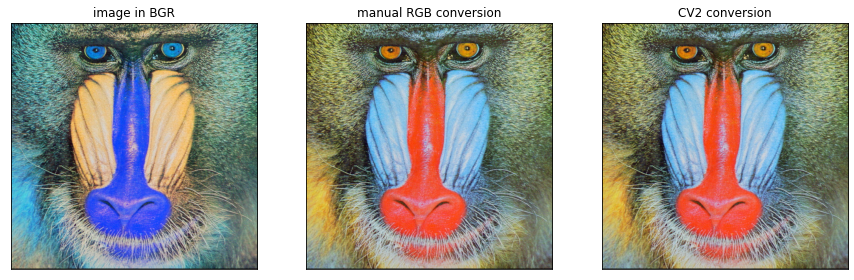

In [ ]:
from matplotlib import pyplot as plt

# Convert BGR color image to RGB color image manually 
b,g,r = cv2.split(img_1)
img_rgb = cv2.merge([r,g,b])

# Show 3 images in one row
plt.subplots(1,3, figsize =(15,15),sharey=True)

# 1st picture
plt.subplot(131)
plt.imshow(img_1)
plt.title('image in BGR'), plt.xticks([]), plt.yticks([])

# 2nd picture
plt.subplot(132)
plt.imshow(img_rgb)
plt.title('manual RGB conversion'), plt.xticks([]), plt.yticks([])

# 3rd picture
plt.subplot(133)
im3 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(im3)
plt.title('CV2 conversion'), plt.xticks([]), plt.yticks([])

plt.show()

## Accessing and Modifying pixel values

source: [opencv.org](https://docs.opencv.org/master/d3/df2/tutorial_py_basic_ops.html)

In [ ]:
import numpy as np

In [ ]:
img_1 = cv2.imread('baboon.jpg')

# display shape of an image
#
# nx: number of pixels in x-direction
# ny: number of pixels in y-direction
# nc: number of color channels (BGR / RGB = 3)

[nx, ny, nc] = img_1.shape

print(f'x: {nx}\ty: {ny}\tcolors: {nc}')

x: 512	y: 512	colors: 3


In [ ]:
# Access a pixel value by its row and column coordinates.
img = img_2
px = img[100,100]
print( px )


# Modify single pixel values
img[100,100] = [255,255,255]
print( img[100,100] )


[255 255 255]
[255 255 255]


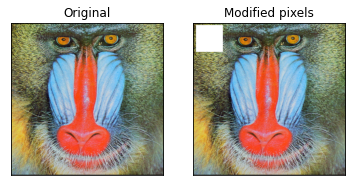

In [ ]:
# Demonstrate pixel modifying with whitening a square of 90x90 pixels
img[10:100, 10:100] = [255, 255, 255]

plt.subplots(nrows=1, ncols=2, sharey=True)

plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
im4 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im4)
plt.title('Modified pixels'), plt.xticks([]), plt.yticks([])

plt.show()

## Convert color image to grayscale image

In [ ]:
# Convert color image to grayscale image
img_1 = cv2.imread('baboon.jpg')

# Get single color channels
b_ch, g_ch, r_ch = img_1[:, :, 0], img_1[:, :, 1], img_1[:, :, 2]

# Take weights according to the opencv conversion documentation
# to convert the color image to grayscale
#
# see: https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html

r_const = 0.299 
g_const = 0.587 
b_const = 0.114 

grayscale_image =  b_const * b_ch + g_const * g_ch + r_const * r_ch

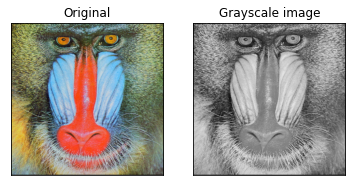

In [ ]:
# Display the grayscale image

plt.subplots(nrows=1, ncols=2, sharey=True)

plt.subplot(121)
img_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale image'), plt.xticks([]), plt.yticks([])

plt.show()

## Displaying Videos

reference:[stackoverflow_57377185](https://stackoverflow.com/questions/57377185/how-play-mp4-video-in-google-colab)

### Upload vidoes

According to the methods used for uploading images into colab, videos can be uploaded in different ways.
Here, 3 methods are demonstrated:
- upload from [local file system](https://colab.research.google.com/drive/1ItoJfGH4nBWyZZ8sprArej9yG3wYd9y2#scrollTo=i2R8XbfyXxAj)
- upload from github
- upload from www.pexels.com

### Load file from the local file system

In [ ]:
from google.colab import files

uploaded = files.upload()

### Load video from a github repository

In [ ]:
!curl --remote-name -H 'Accept: application/vnd.github.v3.raw' --location https://raw.githubusercontent.com/iubh/DLMAIEAIS01_DEV/master/data/cv_pictures/baboon.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  175k  100  175k    0     0   694k      0 --:--:-- --:--:-- --:--:--  694k


### Load video from a web site

Accordingly to the pictures, videos can be downloaded with the ``curl`` command. If the video is hosted as mp4-file on the requested web site, the video can be displayed as video-output. This can be a method for videos which must be processed in some way.<br>
In some cases the video comes from an embedded video player. These videos cannot be decoded and hence not display as video-ouput in colab.<br> In this case it is helpful to show the video as web resource embedded in an ``HTML-iframe``. This method can be used for youtube-videos or pexels-videos for example.
See examples in 'Display video-output' and 'Display embedded video'.

In [ ]:
'# Create variable for the output file path
video_path = '/content/video_1.mp4'

!curl -o $video_path --location https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-mp4-file.mp4

# Note: videos from www.pexels.com can be downloaded this way, but they come from a player and hence cannot be proccesed 
# for decoding or compressing. See description above

!curl -o 'my_pexels_video' --location https://player.vimeo.com/external/210753513.sd.mp4?s=0f50f7331a16ca6ce5135caba9db2c7a7519b317&profile_id=164&oauth2_token_id=57447761


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  317k  100  317k    0     0   536k      0 --:--:-- --:--:-- --:--:--  536k


### Display video-output

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Open video as binary
mp4 = open(video_path,'rb').read()

# Show video
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

According to the article from [towardsdatascience](https://towardsdatascience.com/), it is helpful to compress videos. For example, doing detection operations, the output video much larger than the original video.<br>
reference: [towardsdatascience_yolov3_on_google_colab](https://towardsdatascience.com/yolov3-pytorch-on-google-colab-c4a79eeecdea)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = video_path

# Compressed video path
compressed_path = "result_compressed.mp4"

# Compress video
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

### Display embedded videos

With the ``iframe-tag`` it is possible to display embedded videos from [youtube](www.youtube.com) or [pexels](www.pexels.com) for example.<br>

reference: [stackoverflow_52050860](https://stackoverflow.com/questions/52050860/playing-videos-on-google-colab)



In [ ]:
# Display youtube-video

from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/lTTZ8PkQ_Pk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


In [ ]:
# Display video from www.pexels.com

from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.pexels.com/de-de/video/menschen-die-nachts-auf-einer-geschaftsstrasse-gehen-3521318/" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; pictur-in-picture" allowfullscreen></iframe>')
